# **Obtaining and cleaning our data**

In [1]:
#importing the libs that we'll be needing.
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime

#sales data set we'll be using
df = pd.read_csv('https://raw.githubusercontent.com/KeithGalli/Pandas-Data-Science-Tasks/master/SalesAnalysis/Output/all_data.csv')

#checking the first 3 rows of our data
df.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"


In [2]:
#changing to all lower case names for our column headers
df.columns = map(str.lower, df.columns)
df.columns

Index(['order id', 'product', 'quantity ordered', 'price each', 'order date',
       'purchase address'],
      dtype='object')

In [3]:
#changing the name of our columns
df.columns = ['order_id','product', 'quantity_ordered', 'price_each', 'order_date','purchase_address']

In [4]:
#looks like there are some null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   order_id          186305 non-null  object
 1   product           186305 non-null  object
 2   quantity_ordered  186305 non-null  object
 3   price_each        186305 non-null  object
 4   order_date        186305 non-null  object
 5   purchase_address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [5]:
#dropping null values

df = df.dropna()

In [6]:
#taking a quick look in the values of the product column, just to see if something catches my eye
df['product'].value_counts()

USB-C Charging Cable          21903
Lightning Charging Cable      21658
AAA Batteries (4-pack)        20641
AA Batteries (4-pack)         20577
Wired Headphones              18882
Apple Airpods Headphones      15549
Bose SoundSport Headphones    13325
27in FHD Monitor               7507
iPhone                         6842
27in 4K Gaming Monitor         6230
34in Ultrawide Monitor         6181
Google Phone                   5525
Flatscreen TV                  4800
Macbook Pro Laptop             4724
ThinkPad Laptop                4128
20in Monitor                   4101
Vareebadd Phone                2065
LG Washing Machine              666
LG Dryer                        646
Product                         355
Name: product, dtype: int64

In [7]:
#correcting the df, deleting rows that have the word "Product" as a product
df = df.drop(df[df['product'] == 'Product'].index)

In [8]:
#how many unique values we have in every column?
for column in df:
  unique_values = np.unique(df[column])
  nr_values = len(unique_values)
  if nr_values < 15:
    print('the number of unique values for column {} is {} -- {}'.format(column, nr_values, unique_values))
  else:
    print('the number of unique values for column {} is {}'.format(column, nr_values))


the number of unique values for column order_id is 178437
the number of unique values for column product is 19
the number of unique values for column quantity_ordered is 9 -- ['1' '2' '3' '4' '5' '6' '7' '8' '9']
the number of unique values for column price_each is 23
the number of unique values for column order_date is 142395
the number of unique values for column purchase_address is 140787


In [9]:
df.describe()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address
count,185950,185950,185950,185950,185950,185950
unique,178437,19,9,23,142395,140787
top,160873,USB-C Charging Cable,1,11.95,12/15/19 20:16,"193 Forest St, San Francisco, CA 94016"
freq,5,21903,168552,21903,8,9


In [10]:
#before we do anything else, let's apply the 2 decimals float format for better reading of our data
pd.options.display.float_format = "{:,.2f}".format

### **Exploratory Analysis**

In [11]:
#adding a month column
## first, let's transform our 'order date' column to a date format

df['order_date'] = pd.to_datetime(df['order_date'])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   order_id          185950 non-null  object        
 1   product           185950 non-null  object        
 2   quantity_ordered  185950 non-null  object        
 3   price_each        185950 non-null  object        
 4   order_date        185950 non-null  datetime64[ns]
 5   purchase_address  185950 non-null  object        
dtypes: datetime64[ns](1), object(5)
memory usage: 9.9+ MB


In [13]:
#let's check our df's first order
df['order_date'].min()

Timestamp('2019-01-01 03:07:00')

In [14]:
#let's check our df's last order
df['order_date'].max()

Timestamp('2020-01-01 05:13:00')

In [15]:
#adding a month and a day of the week column
df['month'] = pd.DatetimeIndex(df['order_date']).month
df['day_of_week'] = pd.DatetimeIndex(df['order_date']).dayofweek #monday is 0, tuesday is 1...

df.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,day_of_week
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,4
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,6
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,4
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,4
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,1


In [16]:
#adding a total revenue column
## first, we gotta transform our price and quantity columns to intergers

df['price_each'] = pd.to_numeric(df['price_each'])
df['quantity_ordered'] = pd.to_numeric(df['quantity_ordered'])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   order_id          185950 non-null  object        
 1   product           185950 non-null  object        
 2   quantity_ordered  185950 non-null  int64         
 3   price_each        185950 non-null  float64       
 4   order_date        185950 non-null  datetime64[ns]
 5   purchase_address  185950 non-null  object        
 6   month             185950 non-null  int64         
 7   day_of_week       185950 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 12.8+ MB


In [18]:
#adding a total sales column
df['sales'] = df['price_each']*df['quantity_ordered']
df.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,day_of_week,sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,6,99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,4,600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,4,11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,1,11.99


In [19]:
#top 3 months in terms of total revenue
monthly_rev = df.groupby('month').agg({'sales':'sum'})
monthly_rev.sort_values('sales', ascending=False).head(3)

,sales
month,
12,"4,613,443.34"
10,"3,736,726.88"
4,"3,390,670.24"


Text(0.5, 1.0, 'monthly Sales')

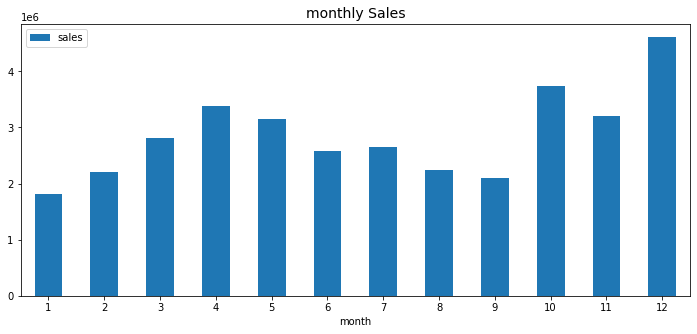

In [20]:
#let's look at it month by month
monthly_rev.plot(kind='bar',rot=360, figsize=[12,5]).set_title('monthly Sales', fontsize=14)

In [21]:
#getting our month over month growth
monthly_rev['monthly_growth'] = monthly_rev['sales'].pct_change()
monthly_rev.reset_index()

,month,sales,monthly_growth
0,1,"1,822,256.73",nan
1,2,"2,202,022.42",0.21
2,3,"2,807,100.38",0.27
3,4,"3,390,670.24",0.21
4,5,"3,152,606.75",-0.07
5,6,"2,577,802.26",-0.18
6,7,"2,647,775.76",0.03
7,8,"2,244,467.88",-0.15
8,9,"2,097,560.13",-0.07
9,10,"3,736,726.88",0.78


Text(0.5, 1.0, 'monthly growth')

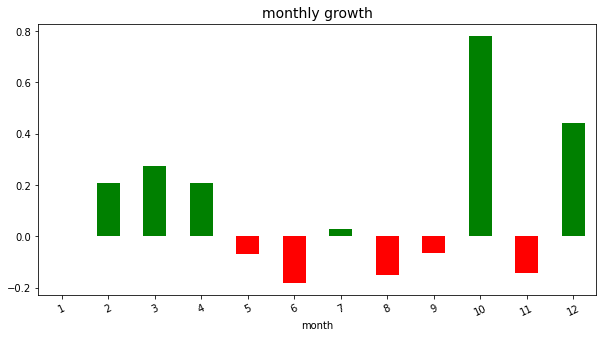

In [22]:
#plotting it!
monthly_rev['monthly_growth'].plot(kind='bar', rot=25,figsize=[10,5], 
                                     color=monthly_rev['monthly_growth'].apply(lambda x: 'g' if x>0 else 'r')).set_title('monthly growth', fontsize=14)

In [23]:
#what's the day of the week that sold the most?
daily_rev = df.groupby('day_of_week').agg({'sales':'sum'})
daily_rev

,sales
day_of_week,
0,"4,883,326.72"
1,"5,087,956.78"
2,"4,988,822.26"
3,"4,839,465.16"
4,"4,855,938.38"
5,"4,904,357.01"
6,"4,932,169.66"


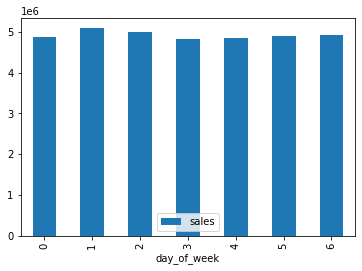

In [24]:
#as we can see, monday's where better, but not by a substantial amount
daily_rev.plot(kind='bar')

In [25]:
#what if we cross the day of the week data with the time the sale happened, maybe we can explore a bit that info
## creating hour column
df['hour'] = pd.DatetimeIndex(df['order_date']).hour
df.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,day_of_week,sales,hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,4,23.90,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,6,99.99,22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,4,600.00,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,4,11.99,14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,1,11.99,9


Text(0.5, 1.0, 'total sales by hour of the day')

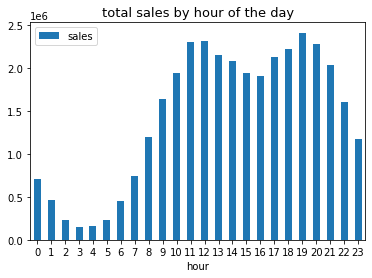

In [26]:
#obtaining a sales by hour chart
rev_hour = df[['hour','sales']].groupby('hour').sum()
rev_hour.plot(kind='bar',rot=0).set_title('total sales by hour of the day', fontsize=13)

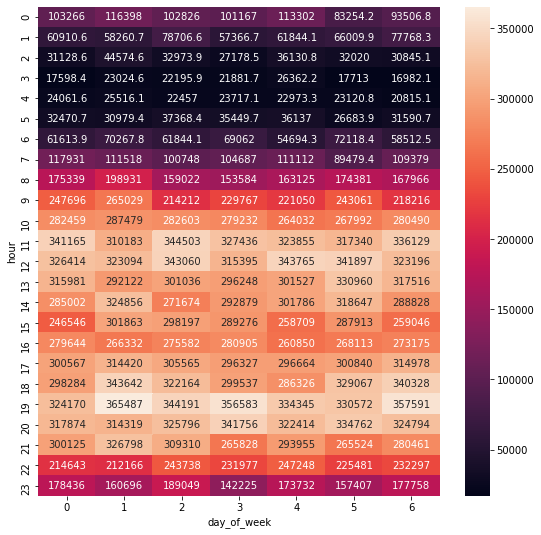

In [27]:
#plotting the agglomeration of sales per hour/day of the week

pivot = df.pivot_table(index='hour', columns='day_of_week', values='sales', aggfunc='sum')

plt.figure(figsize=(9,9))
sns.heatmap(pivot, annot=True, fmt='g') #as we can see with the heatmap and the bar chart above, our peaks start at ~11am and ~7pm

In [28]:
#what city sold the most?
## creating a city column

df['city'] = df['purchase_address'].apply(lambda x: x.split(',')[1]) #this basically means that for the content of a cell, split it by ',' and get the second value 
df.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,day_of_week,sales,hour,city
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,4,23.90,8,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,6,99.99,22,Boston
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,4,600.00,14,Los Angeles
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,4,11.99,14,Los Angeles
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,1,11.99,9,Los Angeles


In [29]:
#creating a state column
df['state'] = df['purchase_address'].apply(lambda x: x.split(',')[2].split(' ')[1]) #splitting twice, first to obtain the state+zip code, then splitting again to get rid of the zip code
df.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,day_of_week,sales,hour,city,state
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,4,23.90,8,Dallas,TX
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,6,99.99,22,Boston,MA
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,4,600.00,14,Los Angeles,CA
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,4,11.99,14,Los Angeles,CA
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,1,11.99,9,Los Angeles,CA


In [30]:
#creating a city_state column
df['city_state'] = df['city']+', '+df['state']
df.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,day_of_week,sales,hour,city,state,city_state
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,4,23.90,8,Dallas,TX,"Dallas, TX"
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,6,99.99,22,Boston,MA,"Boston, MA"
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,4,600.00,14,Los Angeles,CA,"Los Angeles, CA"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,4,11.99,14,Los Angeles,CA,"Los Angeles, CA"
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,1,11.99,9,Los Angeles,CA,"Los Angeles, CA"


In [31]:
df['city_state'].value_counts()

 San Francisco, CA    44732
 Los Angeles, CA      29605
 New York City, NY    24876
 Boston, MA           19934
 Atlanta, GA          14881
 Dallas, TX           14820
 Seattle, WA          14732
 Portland, OR         10010
 Austin, TX            9905
 Portland, ME          2455
Name: city_state, dtype: int64

In [32]:
#what's the city that sold the most?
city_rev = df.groupby('city_state').agg({'sales':'sum', 'order_id':'count'})
city_rev.sort_values('sales', ascending=False) #sf takes the crown in both sales and amount of orders

,sales,order_id
city_state,,
"San Francisco, CA","8,262,203.91",44732
"Los Angeles, CA","5,452,570.80",29605
"New York City, NY","4,664,317.43",24876
"Boston, MA","3,661,642.01",19934
"Atlanta, GA","2,795,498.58",14881
"Dallas, TX","2,767,975.40",14820
"Seattle, WA","2,747,755.48",14732
"Portland, OR","1,870,732.34",10010
"Austin, TX","1,819,581.75",9905


In [33]:
#in terms of quantity, whats the contribution (%) of every city to our revenue?
df['city_state'].value_counts(normalize=True)

 San Francisco, CA   0.24
 Los Angeles, CA     0.16
 New York City, NY   0.13
 Boston, MA          0.11
 Atlanta, GA         0.08
 Dallas, TX          0.08
 Seattle, WA         0.08
 Portland, OR        0.05
 Austin, TX          0.05
 Portland, ME        0.01
Name: city_state, dtype: float64

In [34]:
#calculating the avg ticket spent by city
city_rev['avg_ticket'] = city_rev['sales']/city_rev['order_id']
city_rev.sort_values('avg_ticket', ascending=False) #even though san francisco has the most sales, we can see that atlanta has the highest avg. ticket (not by a lot...)

,sales,order_id,avg_ticket
city_state,,,
"Atlanta, GA","2,795,498.58",14881,187.86
"New York City, NY","4,664,317.43",24876,187.50
"Portland, OR","1,870,732.34",10010,186.89
"Dallas, TX","2,767,975.40",14820,186.77
"Seattle, WA","2,747,755.48",14732,186.52
"San Francisco, CA","8,262,203.91",44732,184.70
"Los Angeles, CA","5,452,570.80",29605,184.18
"Austin, TX","1,819,581.75",9905,183.70
"Boston, MA","3,661,642.01",19934,183.69


In [35]:
#what products were sold the most together?
## getting a df with just the order_id that appear more than once

df1 = df[df['order_id'].duplicated(keep=False)]
df1.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,day_of_week,sales,hour,city,state,city_state
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,4,600.00,14,Los Angeles,CA,"Los Angeles, CA"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,4,11.99,14,Los Angeles,CA,"Los Angeles, CA"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,2,600.00,19,Los Angeles,CA,"Los Angeles, CA"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,2,11.95,19,Los Angeles,CA,"Los Angeles, CA"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,6,99.99,11,Boston,MA,"Boston, MA"


In [36]:
df1['every_product'] = df1.groupby('order_id')['product'].transform(lambda x: ', '.join(x))
df1.head() #as we can see, this results in having "duplicated" orders, like order_id 176560 appears twice, so we should drop that

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,day_of_week,sales,hour,city,state,city_state,every_product
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,4,600.00,14,Los Angeles,CA,"Los Angeles, CA","Google Phone, Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,4,11.99,14,Los Angeles,CA,"Los Angeles, CA","Google Phone, Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,2,600.00,19,Los Angeles,CA,"Los Angeles, CA","Google Phone, USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,2,11.95,19,Los Angeles,CA,"Los Angeles, CA","Google Phone, USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,6,99.99,11,Boston,MA,"Boston, MA","Bose SoundSport Headphones, Bose SoundSport He..."


In [37]:
#getting rid of the duplicates
df2 = df1[['order_id','every_product']].drop_duplicates()
df2.head()

,order_id,every_product
3,176560,"Google Phone, Wired Headphones"
18,176574,"Google Phone, USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones, Bose SoundSport He..."
32,176586,"AAA Batteries (4-pack), Google Phone"
119,176672,"Lightning Charging Cable, USB-C Charging Cable"


In [38]:
#top 20 combinations of products
df2.value_counts('every_product').head(20)

every_product
iPhone, Lightning Charging Cable                        882
Google Phone, USB-C Charging Cable                      856
iPhone, Wired Headphones                                361
Vareebadd Phone, USB-C Charging Cable                   312
Google Phone, Wired Headphones                          303
iPhone, Apple Airpods Headphones                        286
Google Phone, Bose SoundSport Headphones                161
Vareebadd Phone, Wired Headphones                       104
Google Phone, USB-C Charging Cable, Wired Headphones     77
Vareebadd Phone, Bose SoundSport Headphones              60
iPhone, Lightning Charging Cable, Wired Headphones       56
Lightning Charging Cable, USB-C Charging Cable           55
Lightning Charging Cable, AA Batteries (4-pack)          52
AA Batteries (4-pack), Lightning Charging Cable          51
Lightning Charging Cable, Lightning Charging Cable       51
AAA Batteries (4-pack), USB-C Charging Cable             50
AA Batteries (4-pack), AAA

In [42]:
#now, let's see unique buyers by month, and since we don't have a customer id, let's use their address, so our code will actually tell us unique households

monthly_active = df.groupby('month')['purchase_address'].nunique().reset_index()
monthly_active['monthly_growth'] = monthly_active['purchase_address'].pct_change()
monthly_active

,month,purchase_address,monthly_growth
0,1,9185,nan
1,2,11304,0.23
2,3,14245,0.26
3,4,17112,0.20
4,5,15471,-0.10
5,6,12720,-0.18
6,7,13473,0.06
7,8,11300,-0.16
8,9,11025,-0.02
9,10,18914,0.72


Text(0.5, 1.0, 'customer base growth')

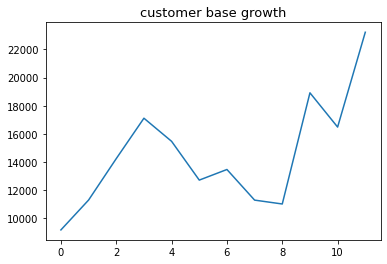

In [43]:
monthly_active['purchase_address'].plot().set_title('customer base growth', fontsize=13)

In [44]:
#by merging monthly_rev and monthly_active, we can see if our monthly sales per household (gonna call it 'sph') has grown
sph = pd.merge(monthly_rev, monthly_active, on='month',how='inner')

del sph['monthly_growth_x'] #deleting column that we don't need
del sph['monthly_growth_y'] #deleting column that we don't need

sph['sales_per_household'] = sph['sales']/sph['purchase_address']
sph['sales_per_household_growth'] = sph['sales_per_household'].pct_change()
sph

,month,sales,purchase_address,sales_per_household,sales_per_household_growth
0,1,"1,822,256.73",9185,198.39,nan
1,2,"2,202,022.42",11304,194.80,-0.02
2,3,"2,807,100.38",14245,197.06,0.01
3,4,"3,390,670.24",17112,198.15,0.01
4,5,"3,152,606.75",15471,203.78,0.03
5,6,"2,577,802.26",12720,202.66,-0.01
6,7,"2,647,775.76",13473,196.52,-0.03
7,8,"2,244,467.88",11300,198.63,0.01
8,9,"2,097,560.13",11025,190.25,-0.04
9,10,"3,736,726.88",18914,197.56,0.04


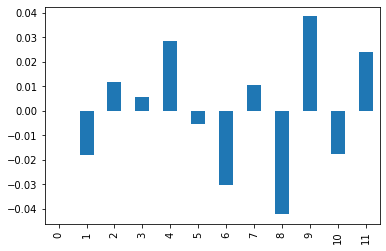

In [45]:
#as we can see, it's been very stable, with variations less than 0.05
sph['sales_per_household_growth'].plot(kind='bar')

# **For now, I think that's it! Thanks a lot**